# Homework 6: Group 1
#### Logistic Regression

David Jung, Ryan Voges, Emily Blake, Spencer Powell, Abraham Alhomadi

In this exercise I want you to apply logistic regression model to the credit card data set which is available on the GitHub folder for HW6. This data set should be familiar as you have done an EDA on it in HW-3 EDA for Credit Card Default dataset on Kaggle.  Import the credit_card_clean.csv as a data frame and call it df. 

## 1. Change the type of the feature variables as you see fit! numerical variables vs categorical ones. You can use my answer key from HW3 as your reference. (5 points)


In [1]:
# Importing all notebooks necessary to carry out our analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
# Importing the credit card data set we will be examining:

df = pd.read_csv("credit_card_clean.csv")

In [4]:
#Viewing the head of the dataset:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,male,grad,single,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,male,grad,single,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,female,university,single,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,female,highschool,married,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,male,highschool,single,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
# Looking at whether our data contains NA values:
df.info()
# our data seems clean! No NA's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [6]:
# Looking at our features and making sure they are properly labeled:
for col in df.columns:
    print(col, df[col].nunique())

ID 30000
LIMIT_BAL 81
SEX 2
EDUCATION 4
MARRIAGE 3
AGE 56
PAY_1 11
PAY_2 11
PAY_3 11
PAY_4 11
PAY_5 10
PAY_6 10
BILL_AMT1 22723
BILL_AMT2 22346
BILL_AMT3 22026
BILL_AMT4 21548
BILL_AMT5 21010
BILL_AMT6 20604
PAY_AMT1 7943
PAY_AMT2 7899
PAY_AMT3 7518
PAY_AMT4 6937
PAY_AMT5 6897
PAY_AMT6 6939
DEFAULT 2


- SEX and DEFAULT should be dummy variables
- EDUCATION, PAY variables and MARRIAGE should be categorical! But why does MARRIAGE have three options?

In [7]:
# Dropped the 0 values from the MARRIAGE variable:
df = df[df.MARRIAGE != "other"]

In [8]:
categoricals = ["EDUCATION", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
dummies = ["SEX", "MARRIAGE", "EDUCATION", "DEFAULT"]

In [9]:
# Convert the floats and ints into categoricals
for col in categoricals:
    df[col]=df[col].astype("category")

## 2. Define your target variable. What are the proportions of default vs non-default in your data set? Is the target variable balanced or relatively imbalanced? 

In [10]:
# Looking at target variable proportions of default and non-default in our dataset and evaluating whether it is balanced:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.89893,0.00000
1,0.00000,22.10107


#### We could see that our data is  relatively imbalanced, where we have 77% of all our observations classified non-default and 22% of our observations classified default

## Data Processing

In [11]:
# Let's check if our data has any na's after we converted our categoricals to dummies:

df.isna().sum()

# Our dataset does not contain na's. 

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

## 3. Use get_dummies( drop_first=True ) function from pandas package to make the categorical variables into dummy variables. How many features you have now?

In [12]:
df = pd.get_dummies(df, columns = dummies, drop_first = True)

In [13]:
# Viewing dataset after converting cateogrical variables into dummy variables:
df.head(10)

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,MARRIAGE_single,EDUCATION_highschool,EDUCATION_other,EDUCATION_university,DEFAULT_1
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,1
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1000.0,1000.0,0.0,2000.0,0,1,0,0,1,1
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,1000.0,5000.0,0,1,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1200.0,1100.0,1069.0,1000.0,0,0,0,0,1,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,10000.0,9000.0,689.0,679.0,1,0,0,0,1,0
5,6,50000.0,37,0,0,0,0,0,0,64400.0,...,657.0,1000.0,1000.0,800.0,1,1,0,0,0,0
6,7,500000.0,29,0,0,0,0,0,0,367965.0,...,38000.0,20239.0,13750.0,13770.0,1,1,0,0,0,0
7,8,100000.0,23,0,-1,-1,0,0,-1,11876.0,...,0.0,581.0,1687.0,1542.0,0,1,0,0,1,0
8,9,140000.0,28,0,0,2,0,0,0,11285.0,...,432.0,1000.0,1000.0,1000.0,0,0,1,0,0,0
9,10,20000.0,35,-2,-2,-2,-2,-1,-1,0.0,...,0.0,13007.0,1122.0,0.0,1,1,1,0,0,0


In [14]:
df.drop("ID", axis=1, inplace=True)

# Dropping the ID feature. 

In [15]:
# Looking at how many features we have now after the conversion of our features from categorical to dummy:
df.tail()

# There is a total of 25 features and one target variable in our dataset. 

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,MARRIAGE_single,EDUCATION_highschool,EDUCATION_other,EDUCATION_university,DEFAULT_1
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,...,5003.0,3047.0,5000.0,1000.0,1,0,1,0,0,0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,...,8998.0,129.0,0.0,0.0,1,1,1,0,0,0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,...,22000.0,4200.0,2000.0,3100.0,1,1,0,0,1,1
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,...,1178.0,1926.0,52964.0,1804.0,1,0,1,0,0,1
29999,50000.0,46,0,0,0,0,0,0,47929.0,48905.0,...,1430.0,1000.0,1000.0,1000.0,1,0,0,0,1,1


In [16]:
# For visual purposes, we will view our features' stat summary and do data visulaization:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29623.0,168304.009722,129920.355452,10000.0,50000.0,140000.0,240000.0,1000000.0
AGE,29623.0,35.401512,9.184117,21.0,28.0,34.0,41.0,79.0
BILL_AMT1,29623.0,51367.263343,73817.041344,-165580.0,3526.0,22398.0,67497.0,964511.0
BILL_AMT2,29623.0,49324.592445,71367.819177,-69777.0,2967.5,21237.0,64252.0,983931.0
BILL_AMT3,29623.0,47170.621038,69543.225178,-157264.0,2648.5,20116.0,60397.0,1664089.0
BILL_AMT4,29623.0,43438.365189,64545.030993,-170000.0,2317.0,19081.0,54862.5,891586.0
BILL_AMT5,29623.0,40483.888330,60998.496767,-81334.0,1760.5,18128.0,50497.0,927171.0
BILL_AMT6,29623.0,39024.155825,59726.352985,-339603.0,1256.5,17099.0,49423.0,961664.0
PAY_AMT1,29623.0,5646.099315,15826.364173,0.0,1000.0,2109.0,5012.0,505000.0
PAY_AMT2,29623.0,5905.689532,22059.322235,0.0,832.0,2012.0,5000.0,1684259.0


### Defining variables and splitting the data

## 4. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%)

In [17]:
# Defining our target variable and the features and splitting the dataset into train and test:
y = df['DEFAULT_1']
X = df.drop('DEFAULT_1', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=rand_state)


In [18]:
# Checking head of training data after split:
X_train.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,MARRIAGE_single,EDUCATION_highschool,EDUCATION_other,EDUCATION_university
19135,30000.0,34,0,0,0,0,0,0,26253.0,27256.0,...,1660.0,1400.0,588.0,600.0,0.0,0,0,0,0,1
49,20000.0,24,0,0,0,0,0,0,17447.0,18479.0,...,1315.0,704.0,928.0,912.0,1069.0,1,1,0,0,0
26803,50000.0,27,2,2,-2,-1,2,2,1893.0,0.0,...,0.0,71.0,0.0,3800.0,0.0,1,1,0,0,0
23735,230000.0,51,0,0,0,0,0,0,213457.0,226037.0,...,10000.0,10000.0,10000.0,10000.0,10000.0,0,1,0,0,1
12648,160000.0,40,1,-2,-2,-2,-2,-2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


In [19]:
y_train.head()

# From the  output below, we see that one person defaulting out of the five in the below observations. 

19135    0
49       0
26803    1
23735    0
12648    0
Name: DEFAULT_1, dtype: uint8

## Logistics Regression  with Sklearn

## 5. From sklearn.linear_model import the relevant functions for Logistic Regression. Do the followings: (30 points)


###    1. Train the logistic regression model using its default parameters. (5 points)


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# Fitting Logistic Regression to the training set:

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

### 2. Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively. (5 points)

In [22]:
# Predicting the Test set probabilities and classes
y_hat      = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of defaults

### 3. Plot the histogram of y_hat_probs? Explain what you see? if you set threshold=0.80, what does the model always predict? What is the implication for recall?

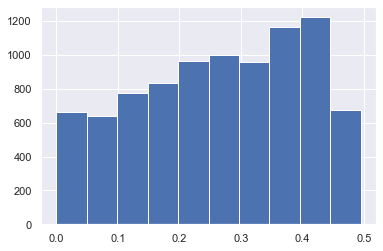

In [23]:
# Plotting the histogram of y_hat_probs:
plt.hist(y_hat_probs)
plt.show()

In [24]:
max(y_hat_probs)
# This is the highest probability in this logistics regression model. If we set the threshold over 53%, then the model will predict no one will default. 

0.4948670279755399

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5): # you could make it even more general!
    logistic= LogisticRegression()
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled

In [26]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,6969,0
Actual : positive,1918,0


In [27]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.8)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,6969,0
Actual : positive,1918,0


##### Provided the model failed to correctly predict true positives, the recall was zero. There could not be predicted positives because the threshold 80 is over the max probability predicted by the model. 

### 4. Generate predicted classifications for two different thresholds (30% and 60% threshold). Save these new predictions as y_hat_30 and y_hat_60. Which threshold should you use if your goal is to avoid too many false negatives? Explain your answer. 

In [28]:
# Generating classification for threshold (30%):
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.3)

-----------------------------------------
Accuracy  = 0.6
Precision = 0.3
Recall    = 0.62
f1_score  = 0.4
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4183,2786
Actual : positive,738,1180


In [29]:
# Generating classification for threshold (60%):
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.6)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,6969,0
Actual : positive,1918,0


#### To avoid too many false negatives, we would use the 30% threshold. The 30% threshold allows the model to predict defaults. This decreases false negatives compared to the 60% threshold. 

### 5. Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous part

In [30]:
y_hat_30 = np.where(y_hat_probs>0.30,1,0)
y_hat_60 = np.where(y_hat_probs>0.60,1,0)
y_hat_80 = np.where(y_hat_probs>0.,1,0)

In [31]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                                'y_hat_30':y_hat_30, 'y_hat_60':y_hat_60, 'y_hat_80':y_hat_80})
df_predictions.tail()

,y_test,y_hat_probs,y_hat_30,y_hat_60,y_hat_80
7069,0,0.182290,0,0,1
9033,0,0.318326,1,0,1
452,0,0.031635,0,0,1
23102,0,0.255138,0,0,1
25565,0,0.395463,1,0,1


## 6) Borrow my logistic report() function from the python notebook of class 11. (25points)

### 1 Report the Accuracy, precision, recall and f1 score along with the confusion matrix for threshold =0.5. Interpret all these statistics. Do you trust the accuracy of the model? why? (15 points)

In [32]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,6969,0
Actual : positive,1918,0


#### We do not trust the accuracy of this model, because the data is relatively imbalanced, where we have 77% of our data classified as non-default and 23% as default. The model is highly skewed and precision, recall, and the f1 score are all 0.

### 2 Now use threshold = 0.3 in the my logistic report() function. what happens to accuracy, precision, recall and f1 score? what happens to false negatives? is this consistent with you answer to question 5.4? (10 points)

In [33]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.3)

-----------------------------------------
Accuracy  = 0.6
Precision = 0.3
Recall    = 0.62
f1_score  = 0.4
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4183,2786
Actual : positive,738,1180


#### The Precision, Recall, and the f_1 score all increased, provided that our threshold is below the maximum 52% probability. Thus the model is now predicting defaults.  



#### We could see that false negatives decreased. This is consistent with our answer to question 5.4.

## 7. Plot the ROC curve and report the AUC score. Is your model doing a better job than random prediction (no skill)? 

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.650


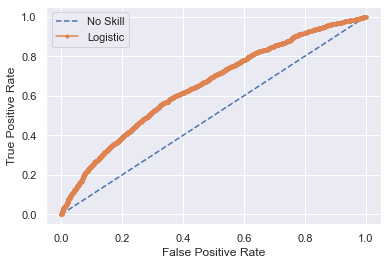

In [35]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0.5 for i in range(len(y_test))]
lr_probs = logistic.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Since our logistic model is above and to the left of the No Skill model, we can say our model is doing a better job than random prediction. 

## 8. Estimate the accuracy_test using K-Fold Cross Validation technique (try K=5 and K=10) and name them as accuracy_CV5 and accuracy_CV10. Are these numbers close to accuracy score from part 6.1? report your numbers with 5 digits precision. Why do you think all these 3 numbers are very close to each other? 

In [36]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [37]:
accuracy_5 = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
accuracy_5=round(accuracy_5.mean(),5)
accuracy_5

0.77667

In [38]:
accuracy_10 = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10 , scoring="accuracy" )
accuracy_10=round(accuracy_10.mean(),5)
accuracy_10

0.77657

#### The accuracy score computed by our model and the score computed using cross fold validation are very close to each other because the cross fold validation is using a 50% threshold, which is its default threshold.  